In [196]:
using LinearAlgebra, Optim, Plots, DataFrames, CSV, StatsPlots
using BenchmarkTools, Distributions, Random, Measures, Statistics
using HypothesisTests

In [166]:
X_gate = DataFrame(CSV.File("../../data/same_params_snap_disp/x_gate34.txt"))
X_gate_double = DataFrame(CSV.File("../../data/same_params_snap_disp/x_gate23_45.txt"))
RX_gate = DataFrame(CSV.File("../../data/same_params_snap_disp/rx_gate.txt"))

Row,fidelity,coefficients
,Float64,String
1,1.20507e-6,"[-0.04655796680841195, -1.2438292833378375, -0.1406460486076321, -0.14079181631807583, -0.046678942303087126, 0.27906031464822534, 1.8863479204732916, -1.2898175746932359, 0.5407841705366296, -2.590294425795943, 1.6119972951312043, 1.4608846382923544, 1.460376135629278, 1.4614619725689404, -4.821975670276195, 1.4611896647380138, 1.4573633778977233, -0.747380276689663, 0.8184810945838297, 3.2310701225570466, -4.387912831043584, -0.35720977306373897, -1.934240834005821, 3.9667236624146898, 2.40331084297529, 0.011449497626258203, -2.3956097138618038, -0.134358673458309, 1.4394809695701825, 0.03625512340061234, -1.5732717273460013, 1.6200414644408898, -2.824640509764129, 0.3334395836920966, 2.417219675660906]"
2,8.15505e-6,"[-0.09873058290370325, -0.09690667491339451, -0.03679773341134153, -0.4906243753589451, 0.17300410660395318, 3.216377297936684, -1.3712575088485013, 2.0610812214446965, 3.038562835329238, 0.6519639308060302, -0.8616456945786094, 0.8471152484212656, 0.6716950373804182, -1.24034112510092, 3.809046750687828, 1.3920895970594447, 3.7203388524035224, 0.8591267581919335, -1.7714872306990788, 1.9173289208648658, 0.6118721893852194, 4.4041757752827, -3.2670839137082077, 2.3356728446053907, 2.6626092669321375, 2.9994922758310025, -3.001194658959084, -2.6794334523275025, -2.2916022059065995, 3.2488190789986304, -2.2485962558785304, -1.505842550594644, -0.23431099833674032, 0.5151517403624025, 1.2532574306133621]"
3,1.15726e-6,"[-0.0002540585026476328, 0.059226469189171425, -0.05919561815586493, -0.05970134121021452, -0.00015954853798958766, 2.6242808767190433, 3.468570344610044, 0.6292876729801703, 4.6329029667086274, -3.412835772295953, -1.314389144790783, 0.08868211752853898, 0.08055068932201265, 0.069459487538915, 4.608445356682769, -1.668420540187266, -1.656125071700939, -0.06137543669294201, -1.0869564032653205, -1.7852384815764033, 2.3022004650897667, 1.0164149964912803, -0.001099822373791362, 3.9416583246364154, -1.334225148806721, -0.661758288055215, -2.9869898324119917, 4.570667663167993, -0.6914464531714899, -2.1148245762820483, 3.350566284503238, -0.05639061057853675, 2.204511028051785, -2.311001123266547, 1.8587612490786607]"
4,0.000215293,"[0.27196970356879696, -0.29074064305079284, -0.9982549435355931, -0.9865772767460822, -0.991322072350017, 1.064313141459096, 0.9747347214803145, 0.851153693490239, 1.1591981351697915, 1.069453836972002, 0.9642033662518564, 3.481992182514418, -2.628019005230769, -2.4310205068304382, -2.6870253568051483, 3.7378660504153136, -2.6239898250421985, 1.1399938675586805, 2.861750813727246, 4.2537653826659705, -2.772802645838739, -1.6495584350190355, -0.7833229064951271, 0.03248676602825607, 0.7624937055684112, -2.459299066709876, 5.145417304341611, 0.09257850824588998, 0.045435053436161804, -2.946609458982109, 0.8005062124600599, 2.5498705332965623, -4.367130568277638, -0.47055691156939894, -1.4366013509533955]"
5,5.9877e-5,"[1.1109633544887438, -0.805462634248983, -0.1002126567329486, 1.108286206792129, -0.7953456756599302, 1.8785787968082548, 2.205803075234327, -4.216909582940494, -1.1674678432045427, 1.9046893868336596, -0.6823072618617221, 1.2838253308073837, 1.4219894514504485, -4.875712385374386, 1.395958006772547, -2.0862681440184176, 1.365346745282141, 0.2790205361055302, 0.5138008564978472, 0.4555427511941626, 0.17743307457680735, 0.3861418598548805, 0.34159664137941465, -2.001141455697675, 4.021608988009034, -2.004052210033365, 1.1176761293928186, -1.9181876507213094, 0.8257821898734052, -2.5948902957497197, -2.311157936373596, 3.7431793491432876, 3.9179433611532364, 0.8803386223959255, -2.6368595422465892]"
6,0.000994585,"[1.4405637781177227, 1.3457255469072524, 1.393051863622358, 1.5383354144345827, -1.599167909836446, -2.6227590347508714, 3.5935449335788987, -0.23216076192764581, 0.1959683225015755, -0.25553433059115327, -4.829279473948677, 1.4802417805727048, 2.175880073968299, -1.0717015489325425, -2.220383287820

# Changing the data because I saved them wrong

In [167]:
RX_NEW = DataFrame(fidelity=[], coefficients=[])

for i in 1:length(RX_gate.coefficients)
    RX_gate.coefficients[i]=replace.(RX_gate.coefficients[i], [','] => "")
    push!(RX_NEW.coefficients,[parse(Float64, ss) for ss in split(RX_gate.coefficients[i][2:end-1])])
    push!(RX_NEW.fidelity, RX_gate.fidelity[i])
end

X_NEW = DataFrame(fidelity=[], coefficients=[])

for i in 1:length(RX_gate.coefficients)
    X_gate.coefficients[i]=replace.(X_gate.coefficients[i], [','] => "")
    push!(X_NEW.coefficients,[parse(Float64, ss) for ss in split(X_gate.coefficients[i][2:end-1])])
    push!(X_NEW.fidelity, X_gate.fidelity[i])
end

X2_45_new = DataFrame(fidelity=[], coefficients=[])

for i in 1:length(RX_gate.coefficients)
    X_gate_double.coefficients[i]=replace.(X_gate_double.coefficients[i], [','] => "")
    push!(X2_45_new.coefficients,[parse(Float64, ss) for ss in split(X_gate_double.coefficients[i][2:end-1])])
    push!(X2_45_new.fidelity, X_gate_double.fidelity[i])
end


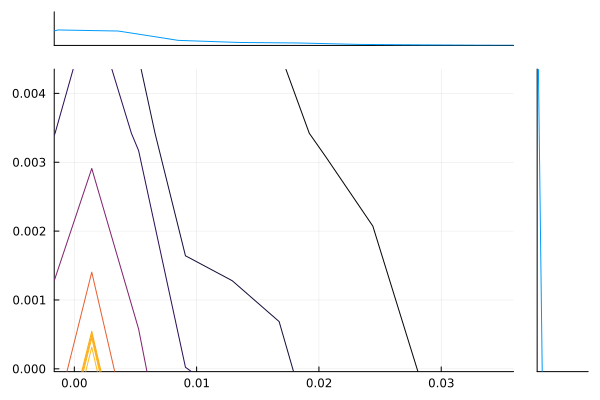

In [168]:
marginalkde(vcat(X_NEW.fidelity...), vcat(RX_NEW.fidelity...))

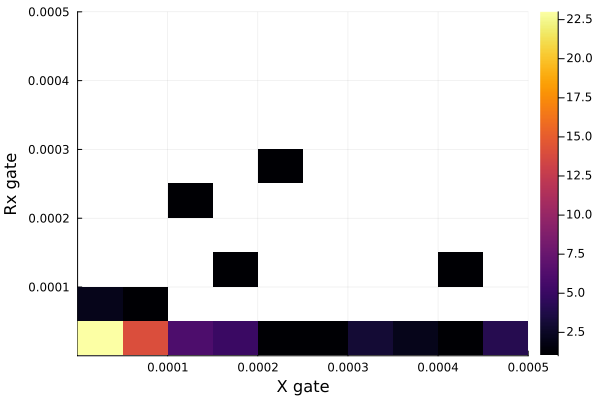

In [169]:
histogram2d(X_NEW.fidelity, RX_NEW.fidelity, bins = (0:5*1e-5:5*1e-4, 0:5*1e-5:5*1e-4))
xlabel!("X gate")
ylabel!("Rx gate")

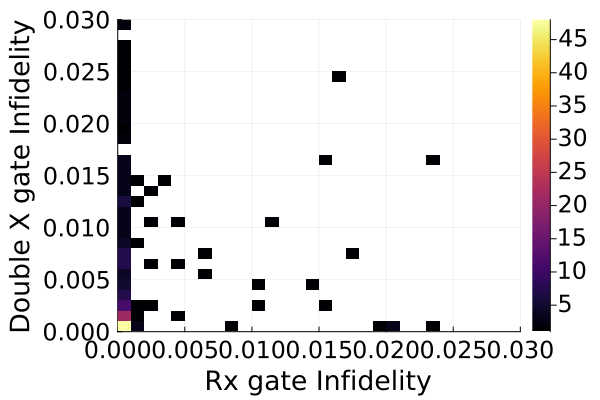

In [170]:
histogram2d(X_NEW.fidelity, RX_NEW.fidelity, bins = (0:1e-3:3*1e-2, 0:1e-3:3*1e-2), xtickfontsize=16,ytickfontsize=16,xguidefontsize=18,yguidefontsize=18,legendfontsize=14, margin=3mm)
xlabel!("X gate Infidelity")
ylabel!("Rx gate Infidelity")
histogram2d(RX_NEW.fidelity, X2_45_new.fidelity, bins = (0:1e-3:3*1e-2, 0:1e-3:3*1e-2), xtickfontsize=16,ytickfontsize=16,xguidefontsize=18,yguidefontsize=18,legendfontsize=14, margin=3mm)
xlabel!("Rx gate Infidelity")
ylabel!("Double X gate Infidelity")
#savefig("histogram_snap_disp_params.svg")

In [176]:
hcat([[X2_45_new.fidelity], [RX_NEW.fidelity], [X_NEW.fidelity]]...)[1]

200-element Vector{Any}:
 0.0021163685534891785
 0.010000314254707154
 0.0005673247788953173
 0.0026785500452677358
 0.0018289047917723344
 0.005187178003137061
 0.0015871205092897744
 0.048706877614924315
 0.00046541376113984345
 0.00823817796054438
 ⋮
 0.030807700685618333
 0.013840987131663929
 0.02531255669065835
 0.01671481764202576
 0.0004567478067856179
 0.0033286051598346855
 0.0007621920316162045
 0.007018580759971527
 0.0009891719738611693

In [209]:
UnequalVarianceTTest(Array{Float64}(X2_45_new.fidelity), Array{Float64}(RX_NEW.fidelity))

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.013346
    95% confidence interval: (-0.009028, 0.03572)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2416

Details:
    number of observations:   [200,200]
    t-statistic:              1.1729169521669411
    degrees of freedom:       374.55053062852943
    empirical standard error: 0.011378512049888856


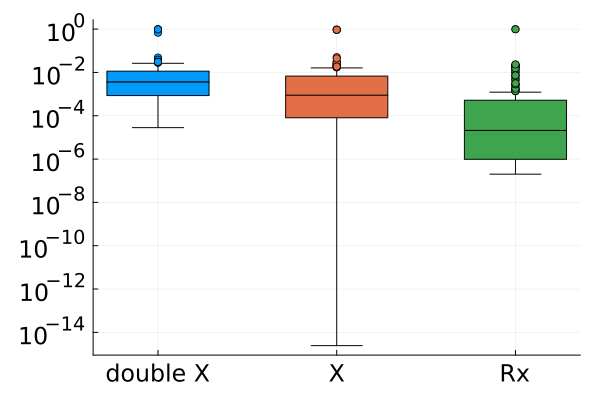

In [194]:
boxplot(["double X"],X2_45_new.fidelity, yaxis=:log, legend=false, yticks=exp10.(range(-18, stop=0, length=10)), xtickfontsize=16,ytickfontsize=16,xguidefontsize=18,yguidefontsize=18,legendfontsize=14, margin=3mm)
boxplot!(["X"],X_NEW.fidelity, yaxis=:log)
boxplot!(["Rx"],RX_NEW.fidelity, yaxis=:log)
#savefig("boxplot_comparison.pdf")

In [103]:
to_delete_x = []
to_delete_x_double = []
to_delete_rx = []

for i in 1:length(X_NEW.fidelity)
    if X_NEW.fidelity[i] > 1e-4
        push!(to_delete_x, i)
    end
    if X2_45_new.fidelity[i] > 5*1e-4
        push!(to_delete_x_double, i)
    end
    if RX_NEW.fidelity[i] > 1e-5
        push!(to_delete_rx, i)
    end
end

delete!(X2_45_new, to_delete_x_double)
delete!(X_NEW, to_delete_x)
delete!(RX_NEW, to_delete_rx)

Row,fidelity,coefficients
,Any,Any
1,1.20507e-6,"[-0.046558, -1.24383, -0.140646, -0.140792, -0.0466789, 0.27906, 1.88635, -1.28982, 0.540784, -2.59029 … 0.0114495, -2.39561, -0.134359, 1.43948, 0.0362551, -1.57327, 1.62004, -2.82464, 0.33344, 2.41722]"
2,8.15505e-6,"[-0.0987306, -0.0969067, -0.0367977, -0.490624, 0.173004, 3.21638, -1.37126, 2.06108, 3.03856, 0.651964 … 2.99949, -3.00119, -2.67943, -2.2916, 3.24882, -2.2486, -1.50584, -0.234311, 0.515152, 1.25326]"
3,1.15726e-6,"[-0.000254059, 0.0592265, -0.0591956, -0.0597013, -0.000159549, 2.62428, 3.46857, 0.629288, 4.6329, -3.41284 … -0.661758, -2.98699, 4.57067, -0.691446, -2.11482, 3.35057, -0.0563906, 2.20451, -2.311, 1.85876]"
4,2.08346e-7,"[-0.0471003, -0.0471005, 0.0450784, 0.045095, -0.0424509, 2.58202, -2.35855, 4.17173, -2.94461, -1.98553 … -4.0937, 0.222259, 0.744991, 1.34316, 2.2107, 2.16608, 2.20759, 0.607872, 0.650663, 0.60392]"
5,7.22192e-7,"[0.0280462, 0.120972, 0.0651923, 0.129271, 0.0486853, 2.56166, -4.81862, -3.01131, 1.50868, 5.22332 … -0.506821, 2.53921, -1.87038, 0.0329553, 2.67156, 3.75089, 0.611462, -1.04629, -3.63009, 0.137814]"
6,1.3408e-6,"[0.0395045, -0.00430374, 0.0392839, 0.0874213, 0.0414114, 2.5267, 1.14739, 1.45552, 2.99895, -2.94248 … -2.12756, 1.02394, 3.22319, -0.837073, -2.86166, 1.38641, -1.30343, -2.77557, 0.836054, -0.404861]"
7,7.73101e-7,"[0.00469889, -0.16637, 0.0538535, -0.0163497, -0.109251, -0.550676, -2.51059, -0.282377, 3.71995, -1.80934 … 0.557026, 0.428348, 1.12488, 1.78532, -2.25071, 4.81801, -1.27795, -2.16594, -2.66953, -3.18441]"
8,3.84756e-6,"[-0.0645197, -0.140393, -0.0768041, -0.0810671, -0.0200802, 4.82669, 2.42339, -0.38396, -4.47793, -1.70675 … -0.237476, 1.17384, -1.2751, 1.52506, 1.29117, -2.04452, 1.62171, 2.9806, -0.642592, 1.39675]"
9,6.05166e-7,"[-0.0367376, 0.0730433, 0.0460023, 0.045366, -0.0548562, 5.10921, -1.84347, 4.69018, -3.47432, -3.23516 … -1.89536, -1.29534, -1.18979, 2.51682, -0.800517, -0.311954, 5.80154, -2.26329, -2.47312, 3.46482]"


In [104]:
X_NEW.coefficients

53-element Vector{Any}:
 [0.18274468888541276, 0.1764484560523047, 0.46422406615432504, 0.18915939212400618, 0.00798167749222742, -0.483773485564352, 4.176799944287462, -3.1545819783837725, 0.6994644771041361, -2.2730597980734535  …  1.2841626743913377, 1.4623186845726766, 4.110835732484424, 0.0323069393752464, -2.279748516988745, -1.0542829980522048, 0.8936156616510356, 0.7775610311536569, -0.35515846543689256, -3.92671715214958]
 [-0.0071428455433756605, -0.18659150113918432, -0.1884159450841208, -0.4888884512046601, -0.18620386166850653, 2.3051028286120157, -2.774266791132211, -4.648288377291242, 1.7792536374685253, 3.1103313265197943  …  0.30499316185891534, 2.9954665130470706, -4.142003699560306, 1.4106736034079386, 0.7884336203750318, 3.6950501911851608, 0.10164367844344295, 0.7579624945915933, -2.8599443291882696, 0.012194556477236117]
 [0.15400997138872344, -0.6368106386150729, -0.08866248586957523, 0.2039615271420864, 0.06684152211073154, 1.0780391881414506, 1.426316343062879,

In [105]:
matrix_angles = []
for i in 6:length(X_NEW.coefficients[1])
    angles = hcat(X_NEW.coefficients...)[i,:]
    angles_mapped = [ if param > 0 param%(2*pi) else 2*pi + (param%(2*pi)) end for param in angles]
    push!(matrix_angles,angles_mapped)
end

disp_params = []
for i in 1:5
    disp_params = [disp_params...,hcat(X_NEW.coefficients...)[i, :]]
end

matrix_angles

30-element Vector{Any}:
 [5.799411821615235, 2.3051028286120157, 1.0780391881414506, 5.582942469507495, 3.34578741325183, 3.3607792149609517, 3.601357685612919, 1.1882725606485964, 5.0132015959781056, 2.5573838897757275  …  0.3737132543825278, 6.000003208511897, 1.8071836610852792, 2.9685756607234253, 1.6635699324421496, 3.219490292228738, 4.829435882532632, 4.948517234834308, 6.065033201429041, 2.949867404139749]
 [4.176799944287462, 3.508918516047375, 1.426316343062879, 3.6661406976445177, 3.4389139901678587, 3.5440253218892446, 1.589660853092573, 1.4105229314144456, 3.516168440491735, 5.958078676843452  …  5.803750538258393, 1.5523411417228756, 2.507401950881282, 0.198332427672269, 3.136480381289541, 3.413495621749757, 1.6709231974952008, 4.805914705219324, 2.0912488833961023, 3.103845899308377]
 [3.1286033287958137, 1.6348969298883445, 1.4081982064064096, 3.5021736010018607, 3.454746536347242, 4.0773673836405875, 0.6234723278560819, 5.567833944513101, 2.0112738119711073, 2.78163228

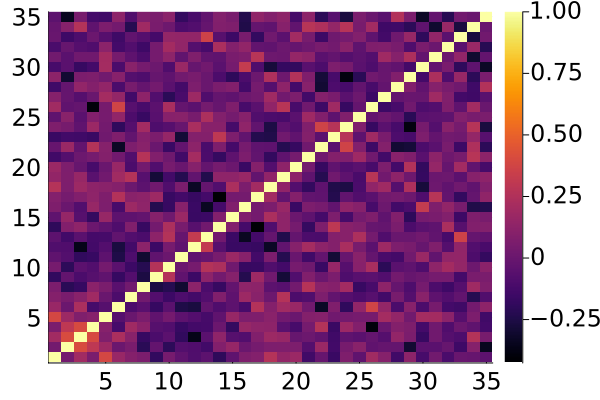

In [106]:
heatmap(cor(hcat(X_NEW.coefficients...)'),xtickfontsize=16,ytickfontsize=16,xguidefontsize=18,yguidefontsize=18,legendfontsize=14, ztickfontsize=14,right_margin=10mm)
#savefig("corr_good_snap_disp_params.svg")

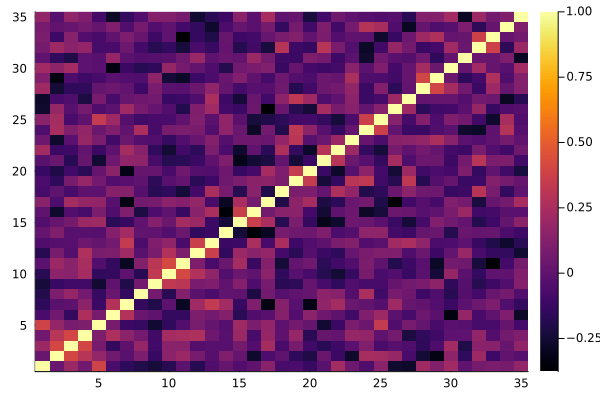

In [107]:
heatmap(cor(hcat(disp_params...,matrix_angles...)))

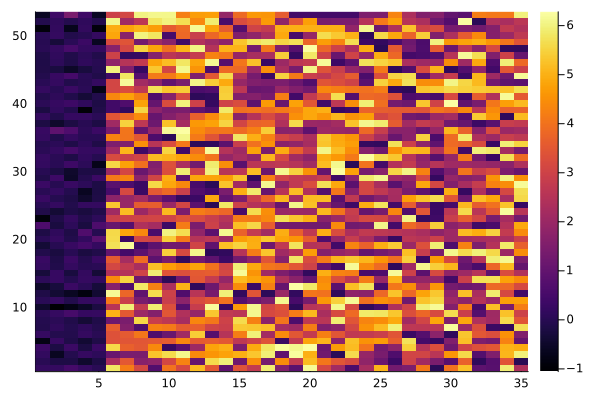

In [108]:
heatmap((hcat(disp_params...,matrix_angles...)))

In [109]:
for row in cor(hcat(X_NEW.coefficients...)')
    for value in row
        if norm(value) > 0.5 && norm(value) < 1
            println(value)
        end
    end
end

### First 5 params are for displacement, rest are are for snap

# DISP parameters analysis

In [110]:
function DISP_params(N,dataframe)
    disp_params = []
    for i in 1:N
        disp_params = [disp_params...,hcat(dataframe.coefficients...)[i, :]]
    end
    return vcat(disp_params...)
end



DISP_params (generic function with 1 method)

### X 23 45

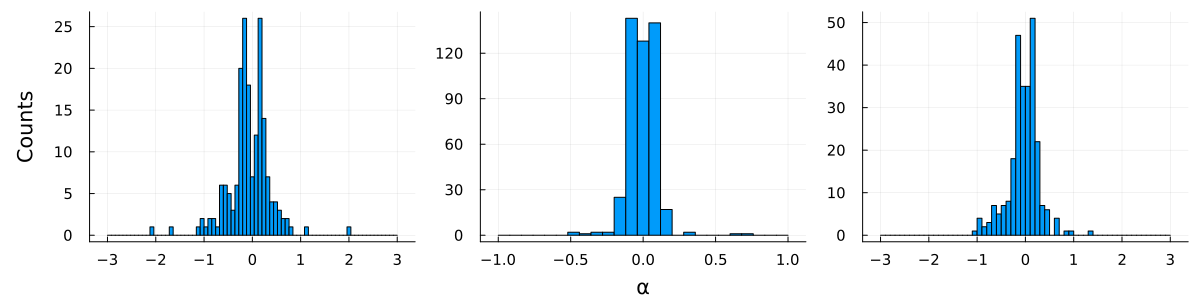

In [111]:
histogram(DISP_params(5,X2_45_new), bins=-3:0.08:3, ylabel="Counts", label="", layout=(1,3), subplot=1, xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14, size=(1200,300), left_margin=10mm, bottom_margin=10mm)
histogram!(DISP_params(5,RX_NEW), bins=-1:0.08:1, ylabel="", xlabel="α", label="", subplot=2, xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14)
histogram!(DISP_params(5,X_NEW), bins=-3:0.1:3, ylabel="", xlabel="", label="", subplot=3, xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14)
#savefig("disp_distribution_bad.pdf")

# SNAP params analysis

In [134]:
function snap_analysis(N,dataframe, dimension, marginal, key1, key2)
    snap_params = []
    L = length(dataframe.coefficients[1])
    for i in N+1:1:length(dataframe.coefficients[1])
        snap_params = [snap_params...,hcat(dataframe.coefficients...)[i, :]]
    end

    snap_params_2 = [ if param > 0 param%(2*pi) else 2*pi + (param%(2*pi)) end for param in vcat(snap_params...)]
    snap_params_3 = [ if param > 0 param%(2*pi) else 2*pi + (param%(2*pi)) end for param in vcat(snap_params...)]
    plt = histogram(snap_params_2, bins=-0.2:0.1:2*pi+0.2, ylabel= "Counts", xlabel="θ", label="")
    #savefig("param_dist_snap.pdf")
    display(plt)

    N = 5
    snap_params = []
    for i in N+1:1:L
        push!(snap_params, [if param > 0 param%(2*pi) else 2*pi + (param%(2*pi)) end for param in hcat(dataframe.coefficients...)[i, :]])
    end

    snap_dict = Dict()
    for i in 1:dimension
        snap_dict["$(i)"] = []
    end
    for (i,val) in enumerate(snap_params)
        snap_dict["$((i-1)%6+1)"] = vcat([snap_dict["$((i-1)%6+1)"]..., snap_params[i]]...)
    end
    for (key,value) in snap_dict
        snap_dict[key] = [if param > 0 param%(2*pi) else 2*pi + (param%(2*pi)) end for param in value]
    end
    if marginal
        plt = marginalkde(snap_dict["$(key1)"],snap_dict["$(key2)"], xlim=(-pi,pi),ylim=(-pi,pi), xlabel="θ_$(key1)", ylabel="θ_$(key2)")
        display(plt)
    end
    histogram(snap_dict["$(key1)"], bins=-0.2:0.1:2*pi+0.2, xlabel="θ", label="θ_$(key1)", ylabel="Counts")
    histogram!(snap_dict["$(key2)"], bins=-0.2:0.1:2*pi+0.2, label="θ_$(key2)", ylabel="Counts")

    return snap_params
end

snap_analysis (generic function with 1 method)

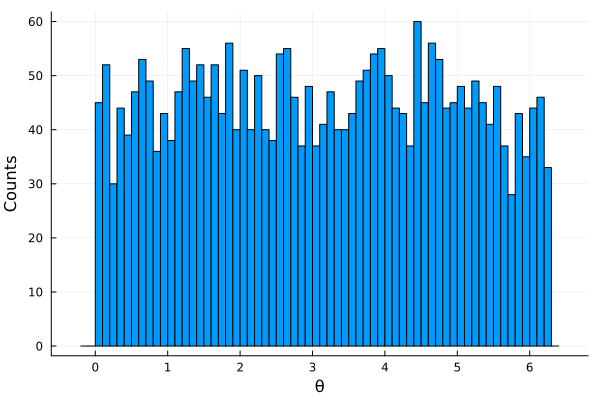

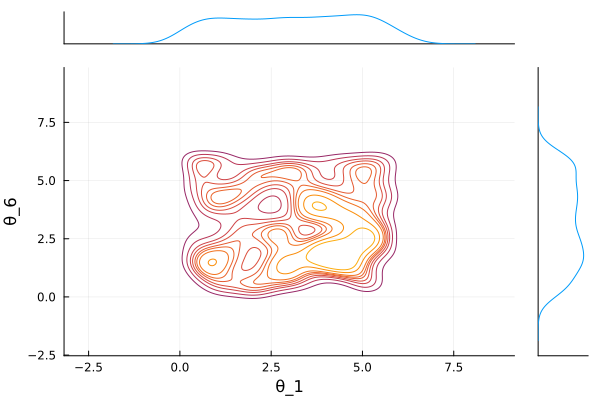

30-element Vector{Any}:
 [0.27906031464822534, 3.216377297936684, 2.6242808767190433, 2.582016681613779, 2.5616614890432805, 2.5266981432477653, 5.732509241101979, 4.826692639989154, 5.109208027354283, 5.558176483601491  …  2.0863770531888024, 0.2225906301972922, 0.6693579115964674, 0.7441815348745856, 0.6857294243549497, 0.584785079779396, 0.9622957846710114, 4.56553874193669, 2.990230872946029, 3.1186563976572743]
 [1.8863479204732916, 4.911927798331085, 3.468570344610044, 3.924637415157356, 1.4645690858158966, 1.1473853469616808, 3.7725989129247983, 2.423392628640229, 4.439714631955022, 4.4682920797109915  …  4.352386690248856, 0.9947782091040624, 0.7029874628525272, 3.797955586868938, 2.817671442125218, 4.038705412261898, 1.8304564058715358, 2.570852816840361, 5.849329922350876, 0.09094167308018285]
 [4.99336773248635, 2.0610812214446965, 0.6292876729801703, 4.171732321665654, 3.2718798724806843, 1.4555242921485672, 6.000808298731747, 5.899225707716136, 4.690177726602635, 1.3450627

In [136]:
snap = snap_analysis(5,RX_NEW, 6, true, "1", "6")

In [137]:
snap_matrix = hcat(snap...)
angle3 = []
angle4 = []
for i in 1:length(snap_matrix[:, 1])
    optimisation_params = snap_matrix[i, :]
    for (l,val) in enumerate(optimisation_params)
        if l in [3,9,15,21,27]
            push!(angle3, val)
        elseif l in [4,10,16,22,28]
            push!(angle4, val)
        end
    end
end

angle1 = []
angle6 = []

angle2 = []
angle5 = []
for i in 1:length(snap_matrix[:, 1])
    optimisation_params = snap_matrix[i, :]
    for (l,val) in enumerate(optimisation_params)
        if l in [6,12,18,24,30]
            push!(angle6, val)
        elseif l in [1, 7, 13, 19, 25]
            push!(angle1, val)
        elseif l in [2,8,14,20,26]
            push!(angle2, val)
        elseif l in [5, 11, 17, 23, 29]
            push!(angle5, val)
        end
    end
end

In [138]:
angle3

475-element Vector{Any}:
 4.99336773248635
 1.4614619725689404
 3.2310701225570466
 0.011449497626258203
 1.6200414644408898
 2.0610812214446965
 5.0428441820786665
 1.9173289208648658
 2.9994922758310025
 4.777342756584942
 ⋮
 1.9556188567466486
 0.19169367138772694
 4.3309735409761885
 5.730604278561178
 2.9523526769530766
 0.9634683713131783
 3.790968911981693
 2.7968901485157502
 4.605890253224881

In [139]:
angle4

475-element Vector{Any}:
 0.5407841705366296
 1.4612096369033916
 1.895272476136002
 3.8875755933177825
 3.458544797415457
 3.038562835329238
 3.809046750687828
 0.6118721893852194
 3.281990648220502
 6.048874308842846
 ⋮
 3.509362641286812
 1.693719067859626
 4.488220470449267
 4.748227304635305
 1.371362820601528
 2.2585815719954745
 5.290510547861391
 1.0650895731825638
 5.108860735437931

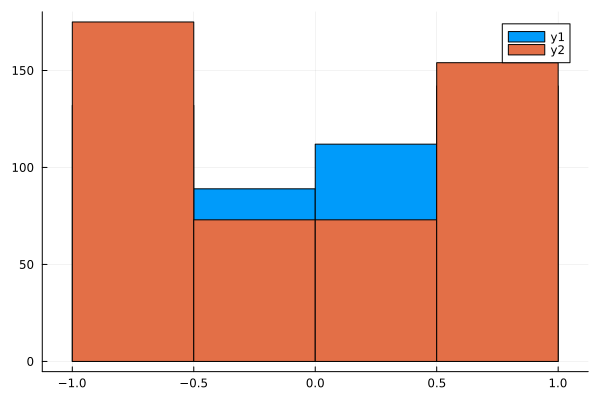

In [146]:
histogram(real(exp.(-im*(angle3-angle4))))
histogram!(imag(exp.(-im*(angle3-angle4))))

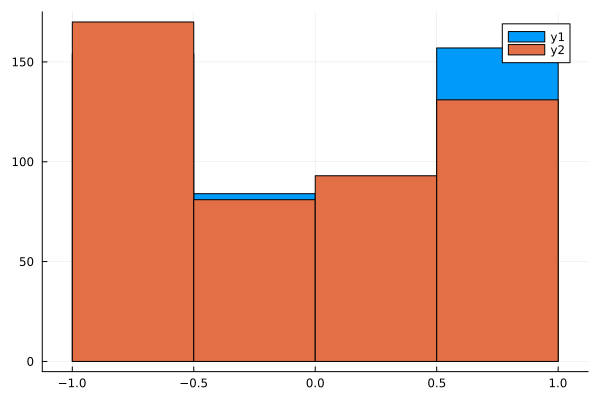

In [145]:
histogram(real(exp.(-im*(angle1-angle6))))
histogram!(imag(exp.(-im*(angle1-angle6))))

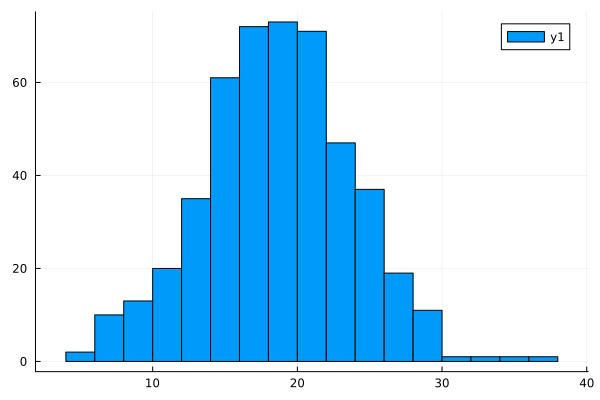

In [142]:
histogram(angle1 + angle2 + angle3 + angle4 + angle5 + angle6)